In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
df=pd.read_csv("FuelConsumption.csv")

In [3]:
df

MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0             AS5        Z                   9.9                  6.7   
1              M6        Z                  11.2                  7.7   
2             AV7        Z                   6.0                  5.8   
3             AS6        Z                  12.7                  9.1   
4             AS6        Z                  12.1                  8.7   
...           ...      ...                   ...                  ...   
1062          AS6        X                  13.4                  9.8   
1063          AS6        X                  13.2                  9.5   
1064          AS6        X                  13.4                  9.8   
1065          AS6        X                  12.9                  9.3   
1066          AS6        X                  14.9                 10.2   

      FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                      8.5                        33           196  
1                      9.6                        29           221  
2                      5.9                        48           136  
3                     11.1                        25           255  
4                     10.6                        27           244  
...                    ...                       ...           ...  
1062                  11.8                        24           271  
1063                  11.5                        25           264  
1064                  11.8                        24           271  
1065                  11.3                        25           260  
1066                  12.8                        22           294  

[1067 rows x 13 columns]

In [4]:
# df.dtypes=="int64"
temp=df.dtypes=="int64"
print(temp[df.dtypes=="int64"])
df[['MODELYEAR','CYLINDERS','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
# temp[df.dtypes=="int64"]

MODELYEAR                   True
CYLINDERS                   True
FUELCONSUMPTION_COMB_MPG    True
CO2EMISSIONS                True
dtype: bool


MODELYEAR  CYLINDERS  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS
0          2014          4                        33           196
1          2014          4                        29           221
2          2014          4                        48           136
3          2014          6                        25           255
4          2014          6                        27           244
...         ...        ...                       ...           ...
1062       2014          6                        24           271
1063       2014          6                        25           264
1064       2014          6                        24           271
1065       2014          6                        25           260
1066       2014          6                        22           294

[1067 rows x 4 columns]

In [5]:
# df[[(df.dtypes=="int64")==True]]

# EXPLORATORY DATA ANALYSIS(EDA)

# 1.1 Data disribution frequency plots (Histogram)

array([[<AxesSubplot: title={'center': 'MODELYEAR'}>,
        <AxesSubplot: title={'center': 'ENGINESIZE'}>,
        <AxesSubplot: title={'center': 'CYLINDERS'}>],
       [<AxesSubplot: title={'center': 'FUELCONSUMPTION_CITY'}>,
        <AxesSubplot: title={'center': 'FUELCONSUMPTION_HWY'}>,
        <AxesSubplot: title={'center': 'FUELCONSUMPTION_COMB'}>],
       [<AxesSubplot: title={'center': 'FUELCONSUMPTION_COMB_MPG'}>,
        <AxesSubplot: title={'center': 'CO2EMISSIONS'}>, <AxesSubplot: >]],
      dtype=object)

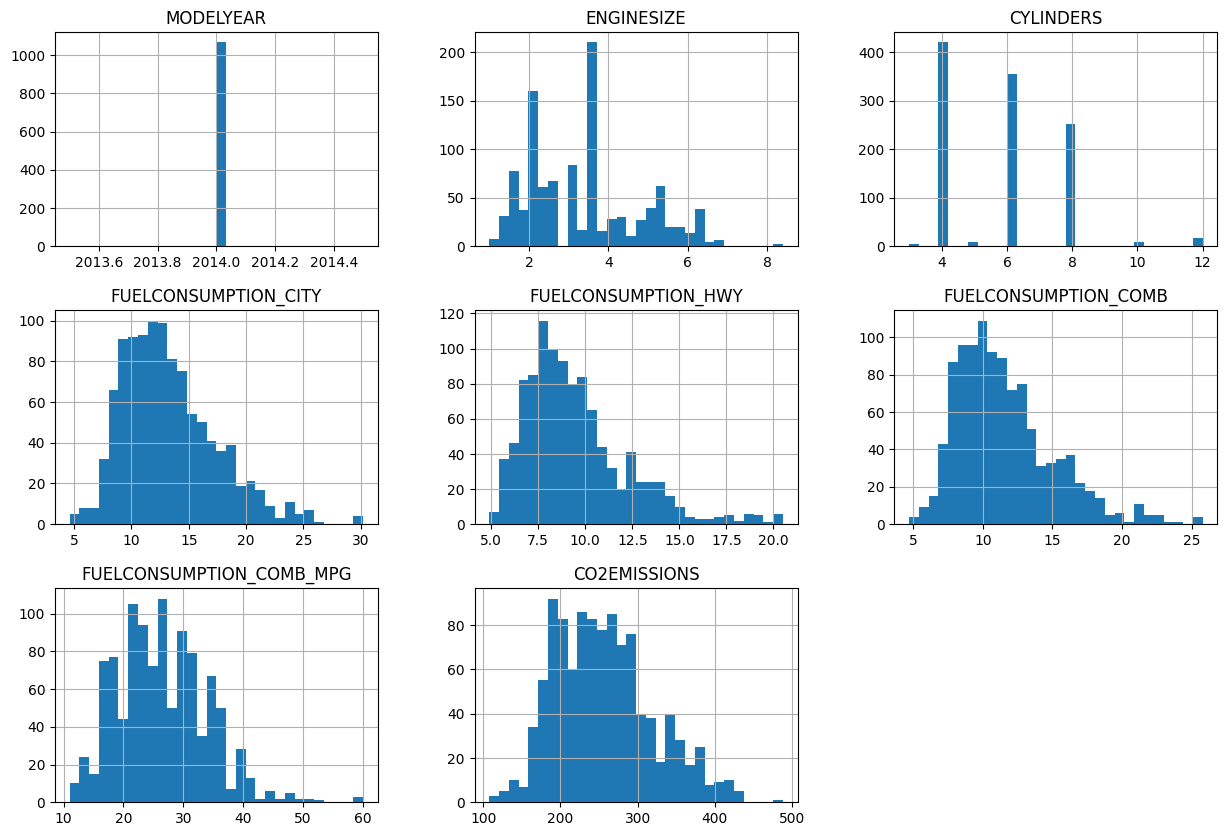

In [6]:
df.hist(bins=30, figsize=(15, 10))
# fig = go.Figure()
# fig = make_subplots(rows=3, cols=2)
# for col in df.columns:
#     fig=px.histogram(df,x=col,color=col)
#     fig.show()

#   fig.add_trace(go.histogram(y=df[col].values, name=df[col].name))
# fig.show()
# px.histogram(df,x="ENGINESIZE")

# 1.2 Scatter plot

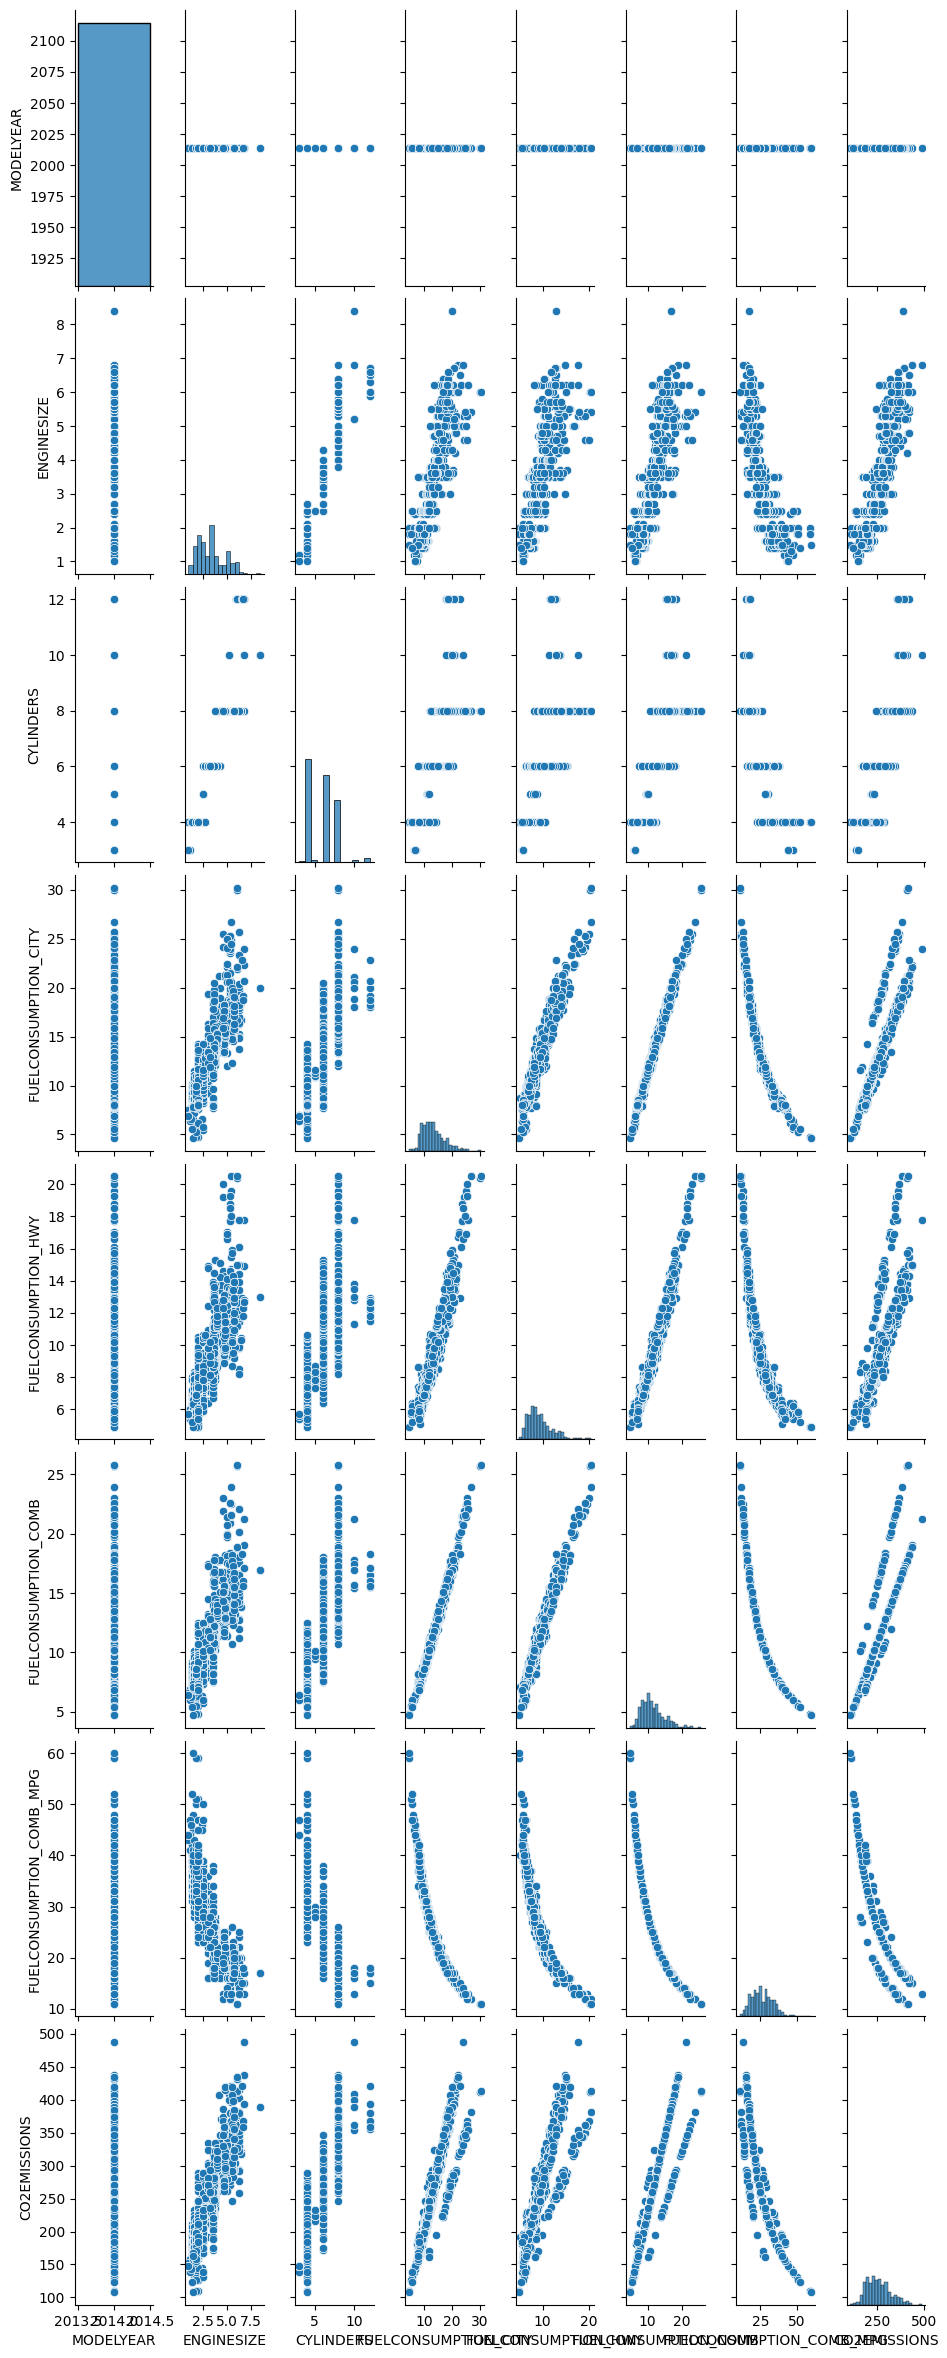

In [7]:
sns.pairplot(df,height=3,aspect=0.4,)
# fig = px.scatter_matrix(df)
# fig.show()

# 1.3 Pearson correlation

C:\Users\Acer\AppData\Local\Temp\ipykernel_12008\1666829373.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="RdYlBu")


<AxesSubplot: >

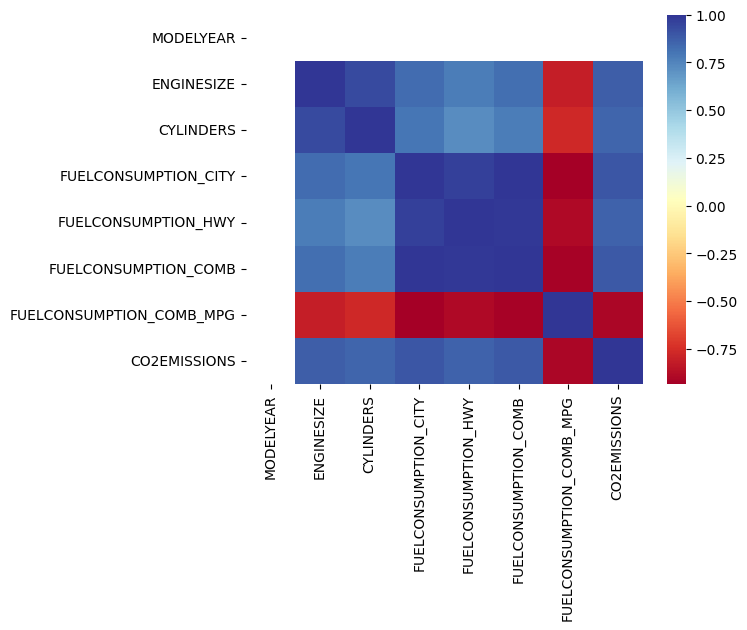

In [8]:
sns.heatmap(df.corr(),cmap="RdYlBu")

# 2. 1 Removing Duplicate values 

In [9]:
s=df[df.duplicated()]
s


Empty DataFrame
Columns: [MODELYEAR, MAKE, MODEL, VEHICLECLASS, ENGINESIZE, CYLINDERS, TRANSMISSION, FUELTYPE, FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY, FUELCONSUMPTION_COMB, FUELCONSUMPTION_COMB_MPG, CO2EMISSIONS]
Index: []

# 2.2 Handling outliers 

In [10]:
# df.boxplot(figsize=(15, 10))

fig = go.Figure()

for col in df:
  fig.add_trace(go.Box(y=df[col].values, name=df[col].name))
  
fig.show()

In [11]:
# sns.boxplot(x="variable", y="value", data=pd.melt(df))


# 2.3 Handling Null values (K-nearest neighbour method)

In [12]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

# 3 Feature Scaling

# 3.1 MINMAXSCALER

In [13]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
CO2=np.array(df["FUELCONSUMPTION_CITY"]).reshape(-1,1)
mc=MinMaxScaler()
mc.fit(CO2)
MIn=mc.transform(CO2)
MIn

array([[0.20703125],
       [0.2578125 ],
       [0.0546875 ],
       ...,
       [0.34375   ],
       [0.32421875],
       [0.40234375]])

In [14]:
#using formula

# 3.2 StandardScaler

[[-0.82855772]
 [-0.5114328 ]
 [-1.77993246]
 ...
 [ 0.02524013]
 [-0.09673099]
 [ 0.3911535 ]]


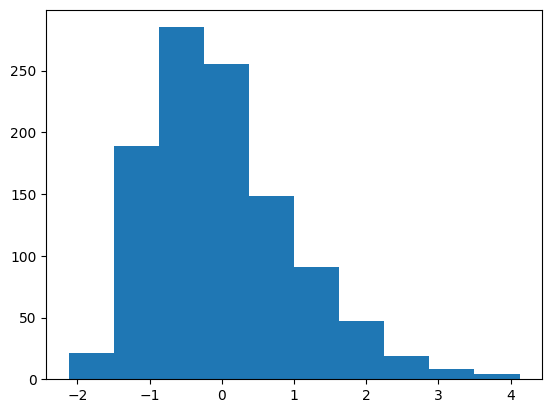

In [15]:
sc=StandardScaler()
Standard=sc.fit_transform(CO2)
print(Standard)
plt.hist(Standard)
plt.show()

In [16]:
df1=df
# df1.drop(df[np.argwhere(df.dtypes==object)],axis=1)
# df[np.argwhere(df.dtypes==object)]
print((df.dtypes==object).info())

<class 'pandas.core.series.Series'>
Index: 13 entries, MODELYEAR to CO2EMISSIONS
Series name: None
Non-Null Count  Dtype
--------------  -----
13 non-null     bool 
dtypes: bool(1)
memory usage: 673.0+ bytes
None


# Training And Test Method

In [18]:
from sklearn.model_selection import train_test_split
df1=df.drop(["MODELYEAR","MAKE","MODEL","VEHICLECLASS","TRANSMISSION","FUELTYPE"],axis=1)
"""###DATA SPILITING ###"""
X=df1.drop(["CO2EMISSIONS"],axis=1)
Y=df1["CO2EMISSIONS"]
print("Shape of x = ",X.shape)
print("Shape of y = ",Y.shape)

Shape of x =  (1067, 6)
Shape of y =  (1067,)


In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=51)
print("Shape of X_train = ",X_train.shape)
print("Shape of Y_train = ",Y_train.shape)
print("Shape of X_test = ",X_test.shape)
print("Shape of Y_test = ",Y_test.shape)

Shape of X_train =  (853, 6)
Shape of Y_train =  (853,)
Shape of X_test =  (214, 6)
Shape of Y_test =  (214,)


In [ ]:
px.scatter_matrix()